Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Loading the Dataset

In [2]:
df = pd.read_csv("dataset.csv")
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Droping id and Unnamed: 32 Columns

In [3]:
df.drop(["id", "Unnamed: 32"], axis=1, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Encodeing the Diagnosis Column (M → 1, B → 0) and visualization

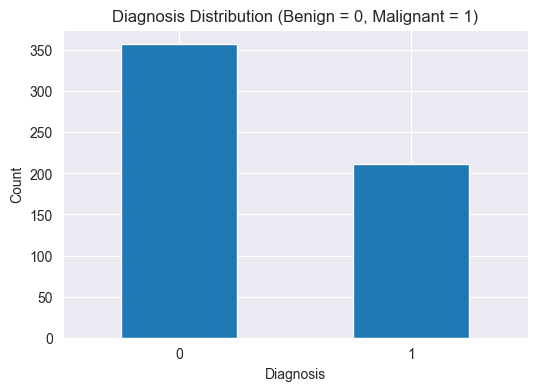

In [4]:
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})
df["diagnosis"].value_counts()
#diagnosis columns inspection
# print("Data type:", df["diagnosis"].dtype)
# print("\nUnique values:", df["diagnosis"].unique())
# print("\nValue counts:\n", df["diagnosis"].value_counts())
# print("\nDescribe:\n", df["diagnosis"].describe())



plt.figure(figsize=(6,4))
df["diagnosis"].value_counts().plot(kind="bar")
plt.title("Diagnosis Distribution (Benign = 0, Malignant = 1)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()



Apply Min-Max Normalization

In [5]:
scaler = MinMaxScaler()

feature_columns = df.columns.tolist()
feature_columns.remove("diagnosis")

df[feature_columns] = scaler.fit_transform(df[feature_columns])


Split Dataset (80% Train, 20% Test)

In [6]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Apply K-Means Clustering (k=2)

In [7]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

df["cluster"] = clusters


Compare Clusters vs Actual Diagnosis

In [8]:
cluster_table = pd.crosstab(df["cluster"], df["diagnosis"])
cluster_table


diagnosis,0,1
cluster,,
0,9,180
1,348,32


Visualize K-Means Cluster Separation (2 PCA dims)

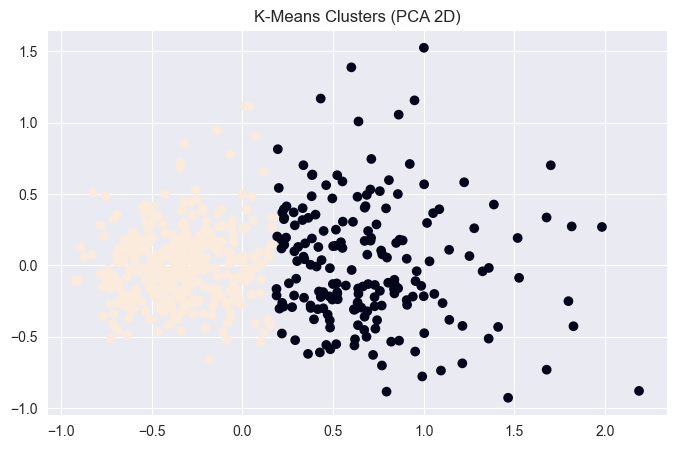

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

plt.figure(figsize=(8,5))
plt.scatter(pca_data[:,0], pca_data[:,1], c=clusters)
plt.title("K-Means Clusters (PCA 2D)")
plt.savefig("kmeans_clusters.png")
plt.show()


Train KNN Model (k=5)

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Make Predictions

In [13]:
y_pred = knn.predict(X_test)


Evaluate Model

In [14]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)


Accuracy: 0.9649122807017544
Precision: 0.9534883720930233
Recall: 0.9534883720930233
F1 Score: 0.9534883720930233


Confusion Matrix

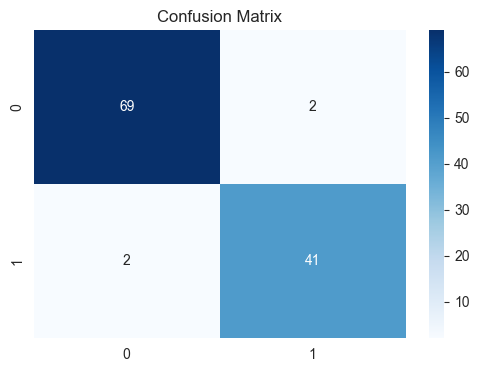

In [15]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")
plt.show()
